In [1]:
# importing necessary libraries
from datetime import date
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install arabic_reshaper

  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.0-cp36-none-any.whl size=16502 sha256=a7484c3236d164b214830473cabb90ced4694c613234bd8a8ce108b804ab2d71
  Stored in directory: /root/.cache/pip/wheels/a9/e6/ec/2ba48138d4447d40442dd6ba3bf6b92d9c6afd74e9c720c6fe
Successfully built arabic-reshaper


In [4]:
!pip install python-bidi

In [5]:
import arabic_reshaper
from bidi.algorithm import get_display


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skew
import csv as csv
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp


import warnings
warnings.filterwarnings("ignore")

In [7]:

import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
from sklearn import preprocessing

In [8]:
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [9]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from keras import backend as K

In [10]:
# to set the default display of numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
# Importing data
df = pd.read_excel('/content/drive/My Drive/24032020 C2A Entities Activities - Master v9_2 (Autosaved).xlsm' ,sheet_name='BreakDown-Master')


In [12]:
#df['pct'] = df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['output pct'].apply(lambda x: x.astype(float)/x.sum())


In [13]:
#pct1=df.loc[: ,['المجموعة' , 'اسم الجهة' ,'اسم المبادرة' ,'output pct','pct' , 'مسلسل']]

In [14]:
#pct1.to_excel("output.xlsx")

In [15]:
# Having a quick view
df.head(10)

,المجموعة,اسم الجهة,الترميز,اسم المبادرة,الانشطة الرئيسة للمشروع,المدة\n (شهر),نسبة المدة,نوع النشاط,البداية المخطط,النهاية المخطط,المخرجات المتوقعة,Started?,Completed,Varience,Planned %,Actual\n %,Origin Budget,Awarded Budget,Outputs Planned Due Date,Outputs Due Amount,Outputs Due,Planned Budget,Actual Payments,Budget Varience,Budget Remaining,ID,لا,output pct,مسلسل,pct,payment_actions,Unnamed: 31
0,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,1,الاعداد والتهيئة,الاعداد والتهيئة,0.00,30.00,Initiative,2018-07-31,2018-07-31,NaN,نعم,قيد التنفيذ,0.50,1.00,0.50,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,لا,nan,1,nan,nan,0.00
1,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,NaN,الاعداد والتهيئة,التواصل مع الجهة لتحديد موعد للاجتماع,0.00,0.50,Activity,2018-07-31,2018-07-31,-,True,نعم,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,نعم,nan,2,nan,nan,0.00
2,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,1.10,الاعداد والتهيئة,اجتماع الاطلاق مع الجهة,0.00,nan,Milestone,2018-07-31,2018-07-31,محضر الاجتماع مع الجهة,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,لا,nan,3,nan,nan,0.00
3,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,NaN,الاعداد والتهيئة,الإجابة عن استفسارات الجهة,0.00,0.50,Activity,2018-07-31,2018-07-31,-,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,لا,nan,4,nan,nan,0.00
4,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,1.20,الاعداد والتهيئة,الانتهاء من الإجابة عن استفسارات الجهة,0.00,nan,Milestone,2018-07-31,2018-07-31,محضر الاجتماع مع الجهة,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,لا,nan,5,nan,nan,0.00
5,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,1.30,الاعداد والتهيئة,استلام تحليل أصحاب المصلحة والمفوضين عن كل مبادرة,0.00,nan,Output,2018-07-31,2018-07-31,ملف تحليل أصحاب المصلحة والمفوضين,True,لا,nan,nan,nan,nan,nan,2018-08-29,0.00,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ا...,لا,55.00,6,1.00,nan,0.00
6,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,2,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,0.00,1.00,Initiative,2018-07-31,2018-07-31,NaN,نعم,قيد التنفيذ,1.00,1.00,0.00,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ط...,لا,nan,7,nan,nan,0.00
7,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,2.10,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,التواصل مع الجهة للمتابعة لطرح الكراسة,0.00,0.25,Activity,2018-07-31,2018-07-31,-,True,نعم,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ط...,نعم,nan,8,nan,nan,0.00
8,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,2.10,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,طرح الكراسة,0.00,nan,Milestone,2018-07-31,2018-07-31,ايميل بتأكيد الطرح,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ط...,لا,nan,9,nan,nan,0.00
9,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,2.20,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,التواصل مع الجهة للمتابعة في استقبال العروض,0.00,0.25,Activity,2018-07-31,2018-07-31,-,True,نعم,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,الادارة العامة للخدمات الطبية للقوات المسلحة|ط...,نعم,nan,10,nan,nan,0.00


In [16]:
PYTHONIOENCODING="UTF-8"  


In [17]:
# Getting sum of planned budget for only phases that started
d1=pd.DataFrame(df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['Planned Budget'].apply(lambda x: (x.astype('float')*(df['Outputs Due']=='نعم')).astype('float').sum())).reset_index()

In [18]:
# Getting sum of Actual payments for only phases that started

d2=pd.DataFrame(df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['Actual Payments'].apply(lambda x: (x.astype('float')*(df['Outputs Due']=='نعم')).astype('float').sum())).reset_index()

In [19]:
#df['pct'] = df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['output pct'].apply(lambda x: x.astype(float)/x.sum())


In [20]:
#df['payment_actions']=df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['Awarded Budget'].transform(lambda x: x.fillna(x.mean()))*df['pct']

In [21]:
#pct1=df.loc[: ,['المجموعة' , 'اسم الجهة' ,'اسم المبادرة' ,'output pct','pct','payment_actions' , 'مسلسل']]

In [22]:
#df11=df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['Completed'].apply(lambda x: (x=='نعم').sum()).reset_index(name='count')


In [23]:
#df12=df.groupby(['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])['نوع النشاط'].apply(lambda x: (x!='Initiative').sum()).reset_index(name='count2')


In [24]:
#df=pd.merge(pd.merge(df,df11 , 'left' , on= ['المجموعة' , 'اسم الجهة' , 'اسم المبادرة']) , df12 , 'left' , on=['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])

In [25]:
#df.head(10)

In [26]:
# merging them to get real variance  
real_variance = pd.merge(d1,d2,on=['المجموعة' , 'اسم الجهة' , 'اسم المبادرة'])

In [27]:
# calculating real byudget variance 
real_variance['variance'] = (real_variance['Actual Payments']-real_variance['Planned Budget'])*(real_variance['Actual Payments']>0)/real_variance['Planned Budget']

In [28]:
# Merging real budget variance to dataset 
df_mod=df.merge(real_variance.loc[ : ,['المجموعة' , 'اسم الجهة' , 'اسم المبادرة','variance']],how='left' , on=['المجموعة' , 'اسم الجهة' , 'اسم المبادرة']  )

In [29]:
# replacing variance by the real variance 
df_mod.loc[df_mod['نوع النشاط'] =='Initiative','Budget Varience'] = df_mod.loc[df_mod['نوع النشاط'] =='Initiative','variance']

In [30]:
# dropping redundant columns
df_mod.drop(columns=['ID' , 'لا', 'output pct',  'pct',
       'payment_actions', 'Unnamed: 31' ,'variance','الترميز'  ] , inplace=True)

In [31]:
#  fixing arabic columns names allignment
for i in df_mod.columns : 
  i=i.strip()

In [32]:

df_mod.columns

Index(['المجموعة', 'اسم الجهة', 'اسم المبادرة', 'الانشطة الرئيسة للمشروع',
       'المدة\n (شهر)', 'نسبة المدة', 'نوع النشاط', 'البداية المخطط',
       'النهاية المخطط', 'المخرجات المتوقعة', 'Started?', 'Completed',
       'Varience', 'Planned %', 'Actual\n %', 'Origin Budget',
       'Awarded Budget', 'Outputs Planned Due Date', 'Outputs Due Amount',
       'Outputs Due', 'Planned Budget', 'Actual Payments', 'Budget Varience',
       'Budget Remaining', 'مسلسل'],
      dtype='object')

In [33]:
df_mod.rename(columns=lambda x: x.strip() , inplace=True)

In [34]:
df_mod.head()

,المجموعة,اسم الجهة,اسم المبادرة,الانشطة الرئيسة للمشروع,المدة\n (شهر),نسبة المدة,نوع النشاط,البداية المخطط,النهاية المخطط,المخرجات المتوقعة,Started?,Completed,Varience,Planned %,Actual\n %,Origin Budget,Awarded Budget,Outputs Planned Due Date,Outputs Due Amount,Outputs Due,Planned Budget,Actual Payments,Budget Varience,Budget Remaining,مسلسل
0,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,الاعداد والتهيئة,0.00,30.00,Initiative,2018-07-31,2018-07-31,NaN,نعم,قيد التنفيذ,0.50,1.00,0.50,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,1
1,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,التواصل مع الجهة لتحديد موعد للاجتماع,0.00,0.50,Activity,2018-07-31,2018-07-31,-,True,نعم,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,2
2,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,اجتماع الاطلاق مع الجهة,0.00,nan,Milestone,2018-07-31,2018-07-31,محضر الاجتماع مع الجهة,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,3
3,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,الإجابة عن استفسارات الجهة,0.00,0.50,Activity,2018-07-31,2018-07-31,-,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,4
4,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,الانتهاء من الإجابة عن استفسارات الجهة,0.00,nan,Milestone,2018-07-31,2018-07-31,محضر الاجتماع مع الجهة,True,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,NaN,nan,5


In [35]:
# better to replace arabic names by english ones
df_mod.columns = ['Group' , 'Holder_name' , 'Initiative_name' , 'Main_activity' , 'Period' , 'Period_%_of_initiative', 'Activity','Planned_start' , 'Planned_end' , 'Expected_output' , 'Started?',
       'Completed', 'Varience', 'Planned', 'Actual', 'Origin_Budget',
       'Awarded_Budget', 'Outputs_Planned_Due_Date', 'Outputs_Due_Amount',
       'Outputs_Due', 'Planned_Budget', 'Actual_Payments', 'Budget_Varience',
       'Budget_Remaining', 'مسلسل']

In [36]:

from IPython.display import HTML
display(HTML('''
<style>
  pre {
      white-space: normal;
  }
</style>
'''))

In [37]:
# Calculating column for Phase name
new_var=[]
for i in range(len(df_mod))  :
  if df_mod['Activity'] [i] in('Phase','Initiative')  : new_var.append(df_mod['Main_activity'][i])
  else : new_var.append(np.nan)


In [38]:
df_mod['phase'] = new_var

In [39]:
df_mod['phase']=df_mod['phase'].ffill()

In [40]:
# calculating field for percentage between awarded and origin budget
df_mod['awarded_pct'] = df_mod['Awarded_Budget']/df_mod['Origin_Budget']

In [41]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43019 entries, 0 to 43018
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Group                     43019 non-null  object        
 1   Holder_name               43019 non-null  object        
 2   Initiative_name           43019 non-null  object        
 3   Main_activity             43019 non-null  object        
 4   Period                    43019 non-null  float64       
 5   Period_%_of_initiative    27290 non-null  float64       
 6   Activity                  43019 non-null  object        
 7   Planned_start             43019 non-null  datetime64[ns]
 8   Planned_end               43019 non-null  datetime64[ns]
 9   Expected_output           37599 non-null  object        
 10  Started?                  40446 non-null  object        
 11  Completed                 43019 non-null  object        
 12  Varience          

we notice here that budget variance , despite numeric field , stored as object , this is due to the value '-'

In [42]:
# replacing '-' value
df_mod['Budget_Varience'] = np.where(df_mod['Budget_Varience']=='-', np.nan , df_mod['Budget_Varience'])

In [43]:
# making sure that budget variance stored oncorrect data type
df_mod['Budget_Varience'] = df_mod['Budget_Varience'].astype('float')

In [44]:
# making sure that Actual and planned target does not exceed 1 (100%)

df_mod.loc[(df_mod['Actual'] > 1 ), 'Actual'] = 1

In [45]:
df_mod.loc[(df_mod['Planned'] > 1 ), 'Planned'] = 1

In [46]:
# Having quick dicriptive statistics
df_mod.describe()

,Period,Period_%_of_initiative,Varience,Planned,Actual,Origin_Budget,Awarded_Budget,Outputs_Due_Amount,Planned_Budget,Actual_Payments,Budget_Varience,Budget_Remaining,مسلسل,awarded_pct
count,43019.00,27290.00,4112.00,4112.00,4112.00,769.00,769.00,9966.00,3342.00,6174.00,1599.00,3342.00,43019.00,769.00
mean,0.65,1.03,0.06,0.29,0.22,55067398.70,44210399.13,6692662.32,13932300.13,6388488.94,-0.05,6064250.92,21510.00,0.80
std,1.76,4.94,0.15,0.38,0.32,8833741.86,7972133.08,8631886.17,17738440.78,9483529.79,0.03,14203576.50,12418.66,0.06
min,0.00,0.00,-0.25,0.00,0.00,40027571.00,28760574.21,0.00,0.00,0.00,-0.20,-17032449.79,1.00,0.70
25%,0.00,0.05,0.00,0.00,0.00,47390534.00,37663300.92,2081804.17,0.00,0.00,-0.07,0.00,10755.50,0.75
50%,0.02,0.10,0.00,0.07,0.05,55000425.00,44155086.64,3050647.96,4192110.53,2994396.34,-0.05,174886.40,21510.00,0.80
75%,0.75,0.25,0.04,0.42,0.33,63089998.00,50403368.70,7607548.51,25250319.08,7377090.72,-0.04,1402532.98,32264.50,0.85
max,30.00,30.00,1.00,1.00,1.00,69990205.00,62408266.20,60526032.24,61717737.97,58109022.02,0.00,61717737.97,43019.00,0.90


In [47]:

#generating 'Status' (our predicted field)

df_mod.loc[((df_mod['Activity'] == 'Phase')| (df_mod['Activity'] == 'Initiative')) &(df_mod ['Varience'] < 0.05 ), 'Status'] = "على المسار"
df_mod.loc[((df_mod['Activity'] == 'Phase')| (df_mod['Activity'] == 'Initiative')) &(df_mod ['Varience'] >= 0.05) & (df_mod ['Varience'] <=0.14) , 'Status'] = "متأخر"

df_mod.loc[ ((df_mod['Activity'] == 'Phase')| (df_mod['Activity'] == 'Initiative')) & (df_mod ['Varience'] > 0.14) , 'Status'] = "متأخر جدا"
df_mod.loc[ ((df_mod['Activity'] == 'Initiative')) & (df_mod ['Started?']=="لم تبدأ") , 'Status'] = "لم تبدأ"
df_mod.loc[ ((df_mod['Activity'] == 'Phase')) & (df_mod ['Completed'] =="لم تبدأ") , 'Status'] = "لم تبدأ"



### Since we will make our predictions on the level of initiative , we have 2 steps

#### 1 - On the level of initiatives : we get main characteristics that are relative to initiative status and check interactions , relationship among them , and betweeneach one and our target(Status)

#### 2 - On the level of phases : we get main characteristics of each phase under each initiative (like status , number of activities , number of outputs , budget characteristics)

## A - On the level of initiatives 

In [48]:
# Getting dataset for relevant fields for each initiative
df_initiative=df_mod.loc[df_mod['Activity']=='Initiative' ,['Group' , 'Holder_name' , 'Initiative_name' , 'Main_activity' , 'Period' , 'Planned_start' , 'Planned_end' ,  'Varience', 'Planned', 'Actual',  'Origin_Budget',
       'Awarded_Budget' ,'Actual_Payments', 'Budget_Varience', 'Budget_Remaining' ,'awarded_pct' ,'Status']]

In [49]:
# getting number of phases for each initiative
df_mod.groupby(['Group' , 'Holder_name' , 'Initiative_name'])['Activity'].apply(lambda x: (x=='Phase').sum()).reset_index(name='number_of_phases')

,Group,Holder_name,Initiative_name,number_of_phases
0,المجموعة الأولى,إدارة الأقتراض الحكومي,الاعداد والتهيئة,0
1,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,0
2,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام...,0
3,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,0
4,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة اعداد الأرصدة الافتتاحية,2
...,...,...,...,...
1534,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,0
1535,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة اعداد الأرصدة الافتتاحية,2
1536,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية...,7
1537,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة مراجعة القوائم المالية للجهة الحكومية,2


In [50]:

df_initiative = df_initiative.merge(df_mod.groupby(['Group' , 'Holder_name' , 'Initiative_name'])['Activity'].apply(lambda x: (x=='Phase').sum()).reset_index(name='number_of_phases'),how='left' , on = ['Group' , 'Holder_name' , 'Initiative_name'])

### Our object now is to predict the status of initiatives that not started yet after they all end 

Since status of each initiative is affected by time , i.e we can not compare status of an initiative started just yesterday and another started months ago.

we have 2 cases :

  1- initiatives already in action . we calculate months spent since it started till(30-4-2020) so we will use that to predict performance of initiatives after spend.


  2- initiatives not started yet : these are our target , so we wil predict its performance at the last day whenall of them ends.

In [51]:
# getting the date when all initiatives end
df_initiative['Planned_end'].max()

Timestamp('2022-10-30 00:00:00')

In [52]:
# computing number of months since initiative started 
df_initiative['since'] = np.where( df_initiative['Status'] != "لم تبدأ" ,  datetime.strptime('2020-04-30', '%Y-%m-%d' ) - df_initiative['Planned_start'] ,  datetime.strptime('2022-10-30', '%Y-%m-%d' ) - df_initiative['Planned_start'] )

In [53]:
df_initiative['since']= ((df_initiative['since'] / np.timedelta64(1, 'D'))/30).astype(int)

### Now , let's explore some features of initiatives

#### We explore our target variable (Status) across initiatives

In [54]:
Intiiative_status=df_initiative['Status'].value_counts()

In [55]:
x=[]
for i in Intiiative_status.index: 
  i = get_display(arabic_reshaper.reshape(i))
  x.append(i)

In [56]:
Intiiative_status.index=x

In [57]:
colors =['#2A9FA5','#E15759' ,'#69B450' , '#F28E2B']


In [58]:
import matplotlib.pyplot as plt


In [59]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return absolute

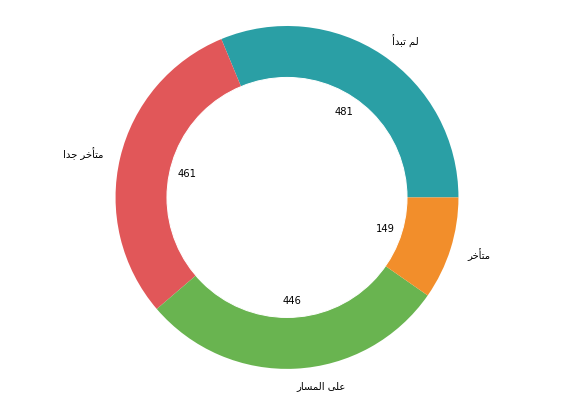

In [60]:

plt.pie(Intiiative_status, labels=Intiiative_status.index, colors=colors , autopct=lambda pct: func(pct, Intiiative_status)
        , shadow=False)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,color='white', fc='white')
fig = plt.gcf( )
fig.set_size_inches(10,7) 
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.show()  



#### Then we explore average percentage of planned per initiative

In [61]:
planned_initiative=pd.DataFrame(df_initiative.loc[df_initiative['Status']!=  'لم تبدأ' , :].groupby(['Status'])['Planned'].mean())

In [62]:
planned_initiative

,Planned
Status,
على المسار,0.70
متأخر,0.74
متأخر جدا,0.95


In [63]:
x=[]
for i in planned_initiative.index: 
  i = get_display(arabic_reshaper.reshape(i))
  x.append(i)

In [64]:
planned_initiative.index=x

In [65]:
planned_initiative['pct']=planned_initiative['Planned'].astype(float).map(lambda n: '{:.2%}'.format(n))

In [66]:
colors =['#69B450' , '#F28E2B' , '#E15759' ]


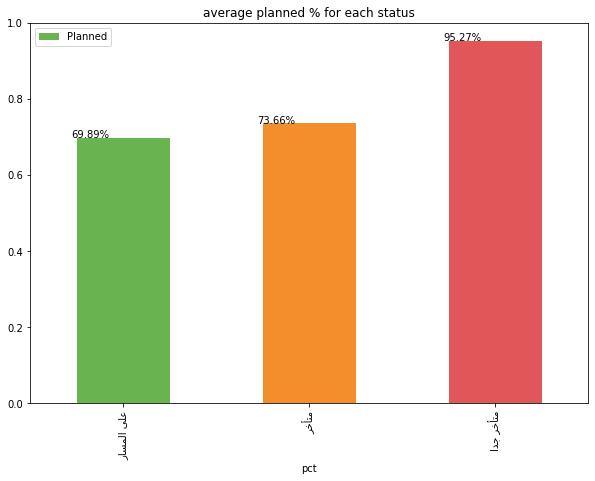

In [67]:
# Plot 
ax = planned_initiative.plot(y='Planned', kind='bar', figsize=(10,7) ,color=colors)
ax.set_title('average planned % for each status')
ax.set_xlabel('pct')


# Labels
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height(), 
            str(round(i.get_height()*100,2))+'%', color='black')

Here we notice that the more the planned gets the less the status

### Now we study initiatives level regarding the relationship between each 2 predictors

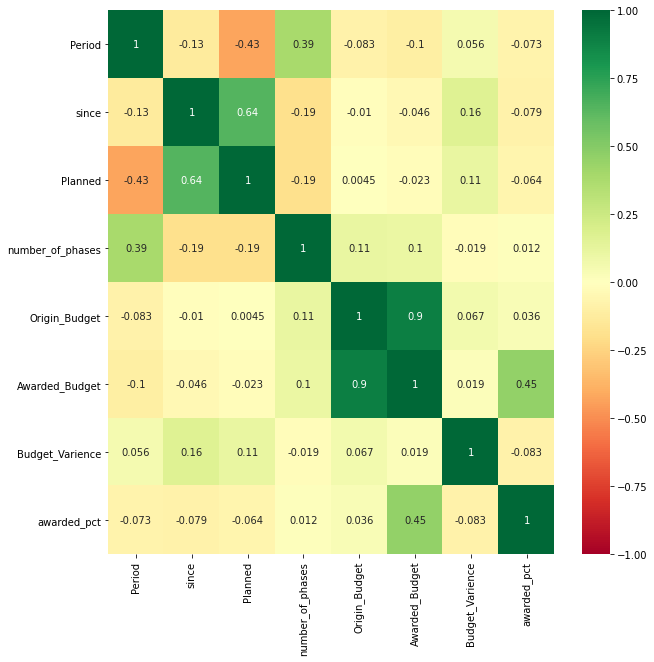

In [68]:
# plotting correla
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_initiative.loc[df_initiative['Status'] != 'لم تبدأ',['Period' , 'since' , 'Planned',  'number_of_phases' ,'Origin_Budget',
       'Awarded_Budget' ,'Budget_Varience' , 'awarded_pct' ]].corr() , annot = True , vmin=-1, vmax=1, center= 0, cmap= 'RdYlGn' , ax=ax )

#### We notice for the first glance that the strongest linear relationship is between (origin and awarded budget) which makes sense.

then we notice average positive relationsship between (since , planned)

also average negative relationsship between (period , planned)

#### Let's explore more the relationship between (since , planned)

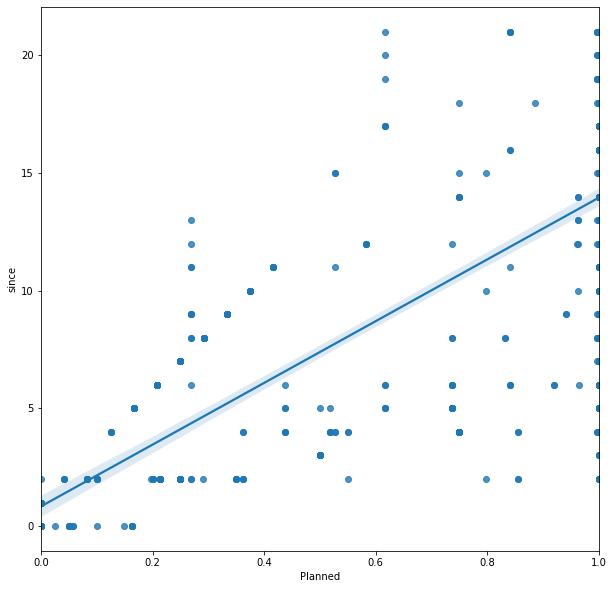

In [69]:
 fig, ax = plt.subplots(figsize=(10,10)) 

 sns.regplot( y='since' , x='Planned', data=df_initiative.loc[df_initiative['Status'] != 'لم تبدأ' ,:] , ax=ax)

### Then , we transfer to studying the relationship between each of predictors and our target variable

we do that using Analysis of variance (ANOVA)

### We run Anova to check how each of our predictors affect status , and to check is this effect significant so to check narrowly whether it is worthy to be included in our model.

In [70]:
lm= ols ('Planned ~ Status' , data=df_initiative).fit()
table = sm.stats.anova_lm(lm)

In [71]:
table

,df,sum_sq,mean_sq,F,PR(>F)
Status,3.00,235.38,78.46,1296.96,0.00
Residual,1535.00,92.86,0.06,nan,nan


#### Here since p- value is less than 0.05 , we see that (planned percentage) differs significantly between each status category 

In [72]:
#Running ANOVA for all numeric predictors
for i in ['Period' , 'since' , 'Planned',  'number_of_phases' ,'Origin_Budget',
       'Awarded_Budget' ,'Budget_Varience' , 'awarded_pct' ]:
       print('Is there a significance difference in' + ' '+ i + ' ' +'for each status')
       print(' ')
       f = sm.stats.anova_lm(ols('{} ~ Status'.format(i), data=df_initiative.loc[df_initiative['Status'] != 'لم تبدأ']).fit())
       print(f)
       print(' ')
       if  f.iloc[0,4] <0.05 : print("'" +i +"'" + ' differs significantly across Status categories')
       print(' ')
       print('________________________')
       print(' ')


Is there a significance difference in Period for each status
 
              df   sum_sq  mean_sq     F  PR(>F)
Status      2.00  2000.23  1000.11 52.42    0.00
Residual 1055.00 20126.73    19.08   nan     nan
 
'Period' differs significantly across Status categories
 
________________________
 
Is there a significance difference in since for each status
 
              df   sum_sq  mean_sq     F  PR(>F)
Status      2.00  2252.01  1126.01 27.65    0.00
Residual 1055.00 42965.46    40.73   nan     nan
 
'since' differs significantly across Status categories
 
________________________
 
Is there a significance difference in Planned for each status
 
              df  sum_sq  mean_sq     F  PR(>F)
Status      2.00   15.70     7.85 89.20    0.00
Residual 1055.00   92.86     0.09   nan     nan
 
'Planned' differs significantly across Status categories
 
________________________
 
Is there a significance difference in number_of_phases for each status
 
              df  sum_sq  mean_sq      

#### So we state that each of( 'Period' , 'since' , 'Planned',  'number_of_phases') differs significaantly as per status , so we include them in our model.

## B - On the level of phases 

## we get a dataset for phases in each initiative


In [73]:
#we get a dataset for phases in each initiative
df_phases=df_mod.loc[((df_mod['Activity'] == 'Phase')| (df_mod['Activity'] == 'Initiative')) , : ]

In [74]:
df_phases['phase_order']=df_phases.groupby(['Group' , 'Holder_name','Initiative_name']).cumcount()

In [75]:
df_phases.head()

,Group,Holder_name,Initiative_name,Main_activity,Period,Period_%_of_initiative,Activity,Planned_start,Planned_end,Expected_output,Started?,Completed,Varience,Planned,Actual,Origin_Budget,Awarded_Budget,Outputs_Planned_Due_Date,Outputs_Due_Amount,Outputs_Due,Planned_Budget,Actual_Payments,Budget_Varience,Budget_Remaining,مسلسل,phase,awarded_pct,Status,phase_order
0,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,الاعداد والتهيئة,0.00,30.00,Initiative,2018-07-31,2018-07-31,NaN,نعم,قيد التنفيذ,0.50,1.00,0.50,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,1,الاعداد والتهيئة,nan,متأخر جدا,0
6,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,0.00,1.00,Initiative,2018-07-31,2018-07-31,NaN,نعم,قيد التنفيذ,1.00,1.00,0.00,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,7,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,nan,متأخر جدا,0
15,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,24.00,30.00,Initiative,2018-08-01,2020-07-31,NaN,نعم,قيد التنفيذ,-0.04,0.84,0.88,47271363.00,34980808.62,NaT,nan,NaN,34980808.62,22533649.72,-0.07,12447158.90,16,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,0.74,على المسار,0
16,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,المرحلة الأولى : مرحلة الحصر ودراسة الوضع الحالي,4.80,0.20,Phase,2018-08-01,2018-12-23,NaN,NaN,قيد التنفيذ,0.00,0.20,0.20,nan,nan,NaT,11803340.33,نعم,11803340.33,11331206.72,-0.04,472133.61,17,المرحلة الأولى : مرحلة الحصر ودراسة الوضع الحالي,nan,على المسار,1
25,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,المرحلة الثانية : مرحلة الجرد والترميز,14.40,0.60,Phase,2018-12-20,2020-02-26,NaN,NaN,قيد التنفيذ,-0.04,0.60,0.64,nan,nan,NaT,12447158.90,نعم,12447158.90,11202443.01,-0.10,1244715.89,26,المرحلة الثانية : مرحلة الجرد والترميز,nan,على المسار,2


#### we get the status of each one of phases in our initiatives 

In [76]:
phases_per_initiative=pd.pivot_table(df_phases.loc[df_phases['Activity']=='Phase' , :], values='Main_activity', index= ['Group' , 'Holder_name','Initiative_name'],
                    columns=['phase_order'], aggfunc=lambda x: x.mode().iat[0]).reset_index()

In [77]:
phases_per_initiative.head()

phase_order,Group,Holder_name,Initiative_name,1,2,3,4,5,6,7
0,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة اعداد الأرصدة الافتتاحية,المرحلة الأولى : التحليل والتخطيط,المرحلة الثانية :التنفيذ و إعداد الارصدة الإفت...,NaN,NaN,NaN,NaN,NaN
1,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية...,المرحلة الأولى : التجهيز للمشروع,المرحلة الثانية : التحليل والتخطيط,المرحلة الثالثة : تطوير وتنفيذ متطلبات النظام,المرحلة الرابعة : الدعم والتدريب ونقل المعرفة,المرحلة الخامسة : دعم الاطلاق (Pilot Run),المرحلة السادسة : الدعم الفني (Operations),NaN
2,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة مراجعة القوائم المالية للجهة الحكومية,الأنشطة الرئيسية,مراجعة الأرصدة الافتتاحية (بيان المركز المالي ...,NaN,NaN,NaN,NaN,NaN
3,المجموعة الأولى,إدارة الأقتراض الحكومي,مسك السجلات المحاسبية,المرحلة الثالثة : التضمين و المساندة في مسك ا...,مساندة وتدريب موظفي (الجهة الحكومية) اثناء ال...,اعداد القوائم الماليّة السنوية للجهة والقوائم...,NaN,NaN,NaN,NaN
4,المجموعة الأولى,الأمانة العامة لمجلس الوزراء,مبادرة اعداد الأرصدة الافتتاحية,المرحلة الأولى : التحليل والتخطيط,المرحلة الثانية :التنفيذ و إعداد الارصدة الإفت...,NaN,NaN,NaN,NaN,NaN


In [78]:
# for easier processing in later modeling steps , we transfer status of each phase in the initiative into a binary steps
phases_per_initiative=pd.get_dummies(data=phases_per_initiative, columns=[1,2,3,4,5,6,7])

In [79]:
phases_per_initiative.head()

,Group,Holder_name,Initiative_name,1_الأنشطة الرئيسية,1_المرحلة الأولى : التجهيز للمشروع,1_المرحلة الأولى : التحليل والتخطيط,1_المرحلة الأولى : مرحلة الحصر ودراسة الوضع الحالي,1_المرحلة الثالثة : التضمين و المساندة في مسك السجلات ونقل المعرفة العملية واعداد القوائم المالية,2_ مساندة وتدريب موظفي (الجهة الحكومية) اثناء العمل على القيام بمسك الحسابات على أساس الاستحقاق,2_المرحلة الثانية : التحليل والتخطيط,2_المرحلة الثانية : مرحلة الجرد والترميز,2_المرحلة الثانية :التنفيذ و إعداد الارصدة الإفتتاحية للاصول والخصوم واعداد المركز المالي الافتتاحي,2_مراجعة الأرصدة الافتتاحية (بيان المركز المالي الافتتاحي),3_ اعداد القوائم الماليّة السنوية للجهة والقوائم الماليّة الموحدة (كما ينطبق) للسنة المالية المنتهية في (تاريخ اول قوائم المالية),3_المرحلة الثالثة : اعداد وثائق متطلبات نظام تخطيط الموارد الحكومية,3_المرحلة الثالثة : التقييم واعداد سجلات الأصول,3_المرحلة الثالثة : تطوير وتنفيذ متطلبات النظام,4_المرحلة الرابعة : الدعم والتدريب ونقل المعرفة,4_المرحلة الرابعة : تطوير وتنفيذ متطلبات النظام,5_المرحلة الخامسة : الدعم والتدريب ونقل المعرفة,5_المرحلة الخامسة : دعم الاطلاق (Pilot Run),6_المرحلة السادسة : الدعم الفني (Operations),6_المرحلة السادسة : دعم الاطلاق (Pilot Run),7_المرحلة السابعة : الدعم الفني (Operations)
0,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة اعداد الأرصدة الافتتاحية,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية...,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0
2,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة مراجعة القوائم المالية للجهة الحكومية,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,المجموعة الأولى,إدارة الأقتراض الحكومي,مسك السجلات المحاسبية,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,المجموعة الأولى,الأمانة العامة لمجلس الوزراء,مبادرة اعداد الأرصدة الافتتاحية,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


For example in the above dataset '1_على المسار	' equals 1 if the first phase in the initiative is 'على المسار' else = 0 and so on

#### Getting number of activities in each phase 

In [80]:
index=pd.pivot_table(df_mod, values=[ 'مسلسل'], index= ['Group' , 'Holder_name','Initiative_name'  , 'phase'],
                     aggfunc=lambda x: x.mode().iat[0]).fillna(0).reset_index()

In [81]:
Activities_per_phase=pd.pivot_table(df_mod, values='Activity', index= ['Group' , 'Holder_name','Initiative_name'  , 'phase'],
                     aggfunc=lambda x: (x=='Activity').sum()).fillna(0).reset_index()

In [82]:
Outputs_per_phase=pd.pivot_table(df_mod, values=['Activity' ], index= ['Group' , 'Holder_name','Initiative_name'  , 'phase'],
                     aggfunc=lambda x: (x=='Output').sum()).fillna(0).reset_index()

In [83]:
Activities_per_phase=Activities_per_phase.merge(df_phases.loc[:, ['Group',	'Holder_name'	,'Initiative_name',	'phase' , 'phase_order']] , how='left' , on=['Group',	'Holder_name'	,'Initiative_name',	'phase'] )

In [84]:
Activities_per_phase_initiative=pd.pivot_table(Activities_per_phase, values='Activity', index= ['Group' , 'Holder_name','Initiative_name'],
                    columns=['phase_order'], aggfunc=lambda x: x.mode().iat[0]).fillna(0).reset_index()

In [85]:
Activities_per_phase_initiative.set_index(['Group' , 'Holder_name','Initiative_name' ],inplace=True)

In [86]:
Activities_per_phase_initiative.columns = [ 'Activities' + ' ' + str(col)  for col in Activities_per_phase_initiative.columns]

In [87]:
Activities_per_phase_initiative.reset_index(col_level = 1 , inplace=True)

In [88]:
Activities_per_phase_initiative

,Group,Holder_name,Initiative_name,Activities 0,Activities 1,Activities 2,Activities 3,Activities 4,Activities 5,Activities 6,Activities 7
0,المجموعة الأولى,إدارة الأقتراض الحكومي,الاعداد والتهيئة,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام...,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة اعداد الأرصدة الافتتاحية,0.00,7.00,6.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1534,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1535,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة اعداد الأرصدة الافتتاحية,0.00,7.00,6.00,0.00,0.00,0.00,0.00,0.00
1536,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية...,0.00,3.00,5.00,7.00,4.00,4.00,4.00,5.00
1537,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة مراجعة القوائم المالية للجهة الحكومية,0.00,4.00,12.00,0.00,0.00,0.00,0.00,0.00


Here 'Activities 0' means the number of activities in initiatives that have no phases 

#### Getting number of outputs in each phase 

In [89]:
Outputs_per_phase=Outputs_per_phase.merge(df_phases.loc[:, ['Group',	'Holder_name'	,'Initiative_name',	'phase' , 'phase_order']] , how='left' , on=['Group',	'Holder_name'	,'Initiative_name',	'phase'] )

In [90]:
outputs_per_phase_initiative=pd.pivot_table(Outputs_per_phase, values='Activity', index= ['Group' , 'Holder_name','Initiative_name'],
                    columns=['phase_order'], aggfunc=lambda x: x.mode().iat[0]).fillna(0).reset_index()

In [91]:
outputs_per_phase_initiative.set_index(['Group' , 'Holder_name','Initiative_name' ],inplace=True)

In [92]:
outputs_per_phase_initiative.columns = [ 'outputs'+ ' ' + str(col)  for col in outputs_per_phase_initiative.columns]

In [93]:
outputs_per_phase_initiative.reset_index(col_level = 1 , inplace=True)

In [94]:
outputs_per_phase_initiative

,Group,Holder_name,Initiative_name,outputs 0,outputs 1,outputs 2,outputs 3,outputs 4,outputs 5,outputs 6,outputs 7
0,المجموعة الأولى,إدارة الأقتراض الحكومي,الاعداد والتهيئة,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,المجموعة الأولى,إدارة الأقتراض الحكومي,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,المجموعة الأولى,إدارة الأقتراض الحكومي,مبادرة اعداد الأرصدة الافتتاحية,0.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1534,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1535,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة اعداد الأرصدة الافتتاحية,0.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00
1536,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية...,0.00,1.00,2.00,7.00,0.00,1.00,2.00,1.00
1537,وزراة الشؤون البلدية والقروية,وزراة الشؤون البلدية والقروية,مبادرة مراجعة القوائم المالية للجهة الحكومية,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00


#### Now , getting budget details on the level of phases in each initiative

In [95]:
fund = [
       'Awarded_Budget']

In [96]:
t_name=[]
for i in fund : 
  it = pd.pivot_table(df_phases, values=i, index= ['Group' , 'Holder_name','Initiative_name' ],columns=['phase_order'],
                     aggfunc='sum').fillna(0).reset_index()
  t_name.append(it)

In [97]:
for i in range(len(fund)):

     t_name[i].set_index(['Group' , 'Holder_name','Initiative_name' ],inplace=True)

In [98]:
for i in range(len(fund)):

     t_name[i].columns = [ fund[i] + ' ' + str(col)  for col in t_name[i].columns]


In [99]:
import functools

dfs =t_name

fund_set = functools.reduce(lambda left,right: pd.merge(left,right , on =['Group' , 'Holder_name','Initiative_name' ],how='outer'),dfs)


In [100]:
fund_set.head()

Awarded_Budget 0  ...  Awarded_Budget 7
Group           Holder_name            Initiative_name                                                       ...                  
المجموعة الأولى إدارة الأقتراض الحكومي الاعداد والتهيئة                                                0.00  ...              0.00
                                       طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات                0.00  ...              0.00
                                       طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام ...              0.00  ...              0.00
                                       طرح كراسة مراجعة القوائم المالية  للجهة الحكوميّة               0.00  ...              0.00
                                       مبادرة اعداد الأرصدة الافتتاحية                          35109405.45  ...              0.00

[5 rows x 8 columns]

### Finally we merge initiative level and phase level  data to get our final data we use in prediction

In [101]:
dfs = [df_initiative.drop(columns=['Actual' , 'Planned_start','Planned_end', 'Actual_Payments', 'Budget_Varience',
       'Budget_Remaining']),outputs_per_phase_initiative , phases_per_initiative]

In [102]:
final_data=functools.reduce(lambda left,right: pd.merge(left,right , on =['Group' , 'Holder_name','Initiative_name' ],how='left'),dfs).fillna(0)

In [103]:
final_data.head()

,Group,Holder_name,Initiative_name,Main_activity,Period,Varience,Planned,Origin_Budget,Awarded_Budget,awarded_pct,Status,number_of_phases,since,outputs 0,outputs 1,outputs 2,outputs 3,outputs 4,outputs 5,outputs 6,outputs 7,1_الأنشطة الرئيسية,1_المرحلة الأولى : التجهيز للمشروع,1_المرحلة الأولى : التحليل والتخطيط,1_المرحلة الأولى : مرحلة الحصر ودراسة الوضع الحالي,1_المرحلة الثالثة : التضمين و المساندة في مسك السجلات ونقل المعرفة العملية واعداد القوائم المالية,2_ مساندة وتدريب موظفي (الجهة الحكومية) اثناء العمل على القيام بمسك الحسابات على أساس الاستحقاق,2_المرحلة الثانية : التحليل والتخطيط,2_المرحلة الثانية : مرحلة الجرد والترميز,2_المرحلة الثانية :التنفيذ و إعداد الارصدة الإفتتاحية للاصول والخصوم واعداد المركز المالي الافتتاحي,2_مراجعة الأرصدة الافتتاحية (بيان المركز المالي الافتتاحي),3_ اعداد القوائم الماليّة السنوية للجهة والقوائم الماليّة الموحدة (كما ينطبق) للسنة المالية المنتهية في (تاريخ اول قوائم المالية),3_المرحلة الثالثة : اعداد وثائق متطلبات نظام تخطيط الموارد الحكومية,3_المرحلة الثالثة : التقييم واعداد سجلات الأصول,3_المرحلة الثالثة : تطوير وتنفيذ متطلبات النظام,4_المرحلة الرابعة : الدعم والتدريب ونقل المعرفة,4_المرحلة الرابعة : تطوير وتنفيذ متطلبات النظام,5_المرحلة الخامسة : الدعم والتدريب ونقل المعرفة,5_المرحلة الخامسة : دعم الاطلاق (Pilot Run),6_المرحلة السادسة : الدعم الفني (Operations),6_المرحلة السادسة : دعم الاطلاق (Pilot Run),7_المرحلة السابعة : الدعم الفني (Operations)
0,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,الاعداد والتهيئة,الاعداد والتهيئة,0.00,0.50,1.00,0.00,0.00,0.00,متأخر جدا,0,21,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,طرح كراسة حصر وجرد وتقييم الأصول الثابتة,0.00,1.00,1.00,0.00,0.00,0.00,متأخر جدا,0,21,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,حصر وجرد وتقييم الأصول الثابتة المتخصصة والبني...,24.00,-0.04,0.84,47271363.00,34980808.62,0.74,على المسار,3,21,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,2.00,0.25,1.00,0.00,0.00,0.00,متأخر جدا,0,21,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,مبادرة اعداد الأرصدة الافتتاحية,مبادرة اعداد الأرصدة الافتتاحية,13.00,0.30,1.00,49981321.00,37485990.75,0.75,متأخر جدا,2,19,0.00,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Since we will predict status of initiatives that not started based on status of initiatives that already started , we divide data on that basis

In [104]:

final_data_train = final_data.loc[final_data['Status'] != 'لم تبدأ' ,:]

In [105]:
final_data_test = final_data.loc[final_data['Status'] == 'لم تبدأ' ,:]

In [106]:
#final_data_train.drop(columns=['Status'] , inplace=True)
#final_data_test.drop(columns=['Status'] , inplace=True)

In [107]:
X_train=pd.get_dummies(final_data_train.drop(columns=[ 'Status','Holder_name'  , 'Varience' ]).fillna(0) , columns = ['Group' ,'Initiative_name'])

In [108]:
X_train.corr()

,Period,Planned,Origin_Budget,Awarded_Budget,awarded_pct,number_of_phases,since,outputs 0,outputs 1,outputs 2,outputs 3,outputs 4,outputs 5,outputs 6,outputs 7,1_الأنشطة الرئيسية,1_المرحلة الأولى : التجهيز للمشروع,1_المرحلة الأولى : التحليل والتخطيط,1_المرحلة الأولى : مرحلة الحصر ودراسة الوضع الحالي,1_المرحلة الثالثة : التضمين و المساندة في مسك السجلات ونقل المعرفة العملية واعداد القوائم المالية,2_ مساندة وتدريب موظفي (الجهة الحكومية) اثناء العمل على القيام بمسك الحسابات على أساس الاستحقاق,2_المرحلة الثانية : التحليل والتخطيط,2_المرحلة الثانية : مرحلة الجرد والترميز,2_المرحلة الثانية :التنفيذ و إعداد الارصدة الإفتتاحية للاصول والخصوم واعداد المركز المالي الافتتاحي,2_مراجعة الأرصدة الافتتاحية (بيان المركز المالي الافتتاحي),3_ اعداد القوائم الماليّة السنوية للجهة والقوائم الماليّة الموحدة (كما ينطبق) للسنة المالية المنتهية في (تاريخ اول قوائم المالية),3_المرحلة الثالثة : اعداد وثائق متطلبات نظام تخطيط الموارد الحكومية,3_المرحلة الثالثة : التقييم واعداد سجلات الأصول,3_المرحلة الثالثة : تطوير وتنفيذ متطلبات النظام,4_المرحلة الرابعة : الدعم والتدريب ونقل المعرفة,4_المرحلة الرابعة : تطوير وتنفيذ متطلبات النظام,5_المرحلة الخامسة : الدعم والتدريب ونقل المعرفة,5_المرحلة الخامسة : دعم الاطلاق (Pilot Run),6_المرحلة السادسة : الدعم الفني (Operations),6_المرحلة السادسة : دعم الاطلاق (Pilot Run),7_المرحلة السابعة : الدعم الفني (Operations),Group_المجموعة الأولى,Group_المجموعة الثالثة,Group_المجموعة الثانية,Group_وزارة التعليم والمؤسسات التعليمية,Group_وزارة الداخلية والجهات الأمنية,Group_وزارة الدفاع والجهات الأمنية,Group_وزراة الشؤون البلدية والقروية,Initiative_name_الاعداد والتهيئة,Initiative_name_حصر وجرد وتقييم الأصول الثابتة المتخصصة والبنية التحتية,Initiative_name_طرح كراسة اعداد الأرصدة الافتتاحية ومسك الحسابات,Initiative_name_طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام المالي للجهات اللامركزية,Initiative_name_طرح كراسة تنفيذ الخصائص التقنية والفنية للنظام المالي للجهات المركزية,Initiative_name_طرح كراسة حصر وجرد وتقييم الأصول الثابتة,Initiative_name_طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,Initiative_name_مبادرة اعداد الأرصدة الافتتاحية,Initiative_name_مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية للنظام المالي للجهات اللامركزية,Initiative_name_مبادرة تنفيذ الخصائص التقنية والمواصفات الفنية للنظام المالي للجهات المركزية,Initiative_name_مبادرة مراجعة القوائم المالية للجهة الحكومية,Initiative_name_مسك السجلات المحاسبية
Period,1.00,-0.43,0.61,0.60,0.63,0.39,-0.13,-0.63,0.35,0.54,0.43,-0.09,-0.02,0.01,0.04,-0.04,-0.02,0.20,0.49,0.46,0.46,-0.02,0.49,0.20,-0.04,0.46,0.04,0.49,-0.09,-0.09,0.04,0.04,-0.09,-0.09,0.04,0.04,-0.06,0.12,-0.01,-0.01,-0.03,0.01,0.04,-0.44,0.49,-0.17,-0.12,-0.07,-0.13,-0.05,0.20,0.04,-0.09,-0.04,0.46
Planned,-0.43,1.00,-0.33,-0.34,-0.35,-0.19,0.64,0.34,-0.01,-0.53,-0.36,-0.01,0.06,0.07,0.08,-0.13,0.06,0.01,-0.12,-0.53,-0.53,0.06,-0.12,0.01,-0.13,-0.53,0.08,-0.12,-0.01,-0.01,0.08,0.08,-0.01,-0.01,0.08,0.08,-0.01,0.04,-0.11,0.07,-0.12,0.03,0.06,0.24,-0.12,0.16,0.11,0.01,0.11,-0.21,0.01,0.08,-0.01,-0.13,-0.53
Origin_Budget,0.61,-0.33,1.00,0.99,0.97,0.82,-0.22,-0.98,0.74,0.62,0.55,0.24,0.44,0.43,0.36,0.10,0.44,0.45,0.30,0.34,0.34,0.44,0.30,0.45,0.10,0.34,0.36,0.30,0.24,0.24,0.36,0.36,0.24,0.24,0.36,0.36,0.01,-0.00,-0.08,0.05,-0.10,0.04,0.04,-0.37,0.30,-0.37,-0.26,-0.21,-0.24,-0.15,0.45,0.36,0.24,0.10,0.34
Awarded_Budget,0.60,-0.34,0.99,1.00,0.98,0.81,-0.22,-0.97,0.73,0.62,0.54,0.25,0.44,0.42,0.35,0.09,0.44,0.45,0.29,0.34,0.34,0.44,0.29,0.45,0.09,0.34,0.35,0.29,0.25,0.25,0.35,0.35,0.25,0.25,0.35,0.35,0.01,-0.00,-0.07,0.04,-0.10,0.04,0.04,-0.37,0.29,-0.36,-0.26,-0.21,-0.24,-0.15,0.45,0.35,0.25,0.09,0.34
awarded_pct,0.63,-0.35,0.97,0.98,1.00,0.82,-0.23,-0.99,0.75,0.65,0.55,0.25,0.43,0.41,0.34,0.09,0.43,0.47,0.30,0.36,0.36,0.43,0.30,0.47,0.09,0.36,0.34,0.30,0.25,0.25,0.34,0.34,0.25,0.25,0.34,0.34,0.01,0.01,-0.07,0.04,-0.10,0.04,0.04,-0.38,0.30,-0.37,-0.27,-0.21,-0.24,-0.15,0.47,0.34,0.25,0.09,0.36
number_of_phases,0.39,-0.19,0.82,0.81,0.82,1.00,-0.19,-0.82,0.51,0.45,0.69,0.42,0.85,0.84,0.72,0.02,0.85,0.08,0.17,

In [109]:
X_test=pd.get_dummies(final_data_test.drop(columns=[ 'Status','Holder_name', 'Varience','Main_activity']).fillna(0) , columns = ['Group' ,'Initiative_name'])

In [110]:
# we check if all fields in test set are included in train set
set(X_train.columns)-set(X_test.columns)

{'Initiative_name_الاعداد والتهيئة', 'Main_activity'}

In [111]:
# since the initiative name (_الاعداد والتهيئة')  is not available in data to predict(test set) we generate if 
X_test['Initiative_name_الاعداد والتهيئة'] = 0


In [112]:
#we make sure that columns are ordered the same in both sets
X_test=X_test.reindex(columns=list(set(X_test.columns)))

In [113]:
X_train=X_train.reindex(columns=list(set(X_test.columns)))

### Finally , we get our model

In [114]:
# we set parameters
input_dim=len(X_train.columns)


In [115]:
#preprocess data(to make values range between 1 and 0 ) 
#X_train=preprocessing.scale(X_train)

X_train=preprocessing.MinMaxScaler().fit_transform(X_train)


In [116]:
#X_test=preprocessing.scale(X_test)


In [117]:
datas=[]
for i in range(-12,0) : 
  j=X_test.copy()
  j.loc[:, 'since'] = j.loc[:, 'since'] +i
  datas.append(j)
  

In [118]:
# transfer labels to binary encoding (i.e status to be transferred into 3 columns the first one equals 1 if 'على  المسار' and so on)
#encoder = LabelEncoder()
#encoder.fit( final_data_train['Status'])

In [119]:
#final_data_train.loc[final_data_train['Varience'] < 0.01 , 'Varience' ] = 0.01


In [120]:
encoder = LabelEncoder()
encoder.fit( final_data_train['Status'])


LabelEncoder()

In [121]:
encoded_Y = encoder.transform(final_data_train['Status'])


In [122]:
encoded_Y

array([2, 2, 0, ..., 2, 1, 0])

In [123]:

encoded_Y = encoder.transform(final_data_train['Status'])
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(encoded_Y)
#y_train= final_data_train['Varience']
#scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

#encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
#y_train = np_utils.to_categorical(encoded_Y)


In [124]:
input_dim

55

In [125]:
#optimizer = keras.optimizers.Adam(lr=0.0001)


In [126]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold


In [127]:
# A parameter grid for XGBoost
#params = {'min_child_weight':[4,5,6], 'gamma':[i/10.0 for i in range(1)],  'subsample':[i/10.0 for i in range(3,7)],
#'colsample_bytree':[i/10.0 for i in range(3,7)], 'max_depth': [9,10,11]}


# Initialize XGB and GridSearch
#xgb = XGBClassifier(nthread=-1 , objective ='multi:softprob' ,learning_rate=0.01 , n_estimators=100 ) 

#grid = GridSearchCV(xgb, params)
#grid.fit(X_train, encoded_Y)

# Print the r2 score
#print(grid.best_estimator_) 


In [128]:
model = XGBClassifier(learning_rate=0.00001, max_depth=10, n_estimators=120000)
kfold = KFold(n_splits=16, random_state=7)
results = cross_val_score(model, X_train, encoded_Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 55.01% (5.02%)


this score after lr=0.01 & n_estimator = 1200

In [129]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
# Model

#clf = svm.SVC(kernel='linear') # Linear Kernel
#clf.fit(X_train, y_train)
model = XGBClassifier(learning_rate=0.001, max_depth=10, n_estimators=1200)
model.fit(X_train, encoded_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Then we get predictions for initiatives that not started 

In [131]:
#predicts=np.round(pd.DataFrame(model.predict(X_train).reshape(-1)) , 2).set_index(final_data_train.index)

In [132]:
#predicts=predicts.merge(final_data_train.loc[: , ['Status','Varience']] , left_on=predicts.index , right_on= final_data_train.index )

In [133]:
#predicts.drop(columns=['key_0'] , inplace=True)

In [134]:
#predicts.head()

In [135]:
#predicts.columns=['predicted_variance' , 'Status' , 'Varience' ]

In [136]:

#generating 'Status' (our predicted field)
#predicts['pred_Status'] = np.nan
#predicts.loc[(predicts ['predicted_variance'] < 0.05 ), 'pred_Status'] = "على المسار"
#predicts.loc[(predicts ['predicted_variance'] >= 0.05) & (predicts ['predicted_variance'] <=0.14) , 'pred_Status'] = "متأخر"

#predicts.loc[ (predicts ['predicted_variance'] > 0.14) , 'pred_Status'] = "متأخر جدا"



In [137]:
#np.round((accuracy_score(predicts['Status'] , predicts['pred_Status'])*100),0)

In [138]:
PREDICTED_CLASSES1 = model.predict(X_train)


In [139]:
p=pd.Series(encoder.inverse_transform(PREDICTED_CLASSES1))


In [140]:
p.value_counts()

متأخر جدا     565
على المسار    356
متأخر         137
dtype: int64

In [141]:
predicts=pd.DataFrame(p).set_index(final_data_train.index)

In [142]:
pd1=predicts.merge(final_data_train.loc[: , ['Status']] , left_on=predicts.index , right_on= final_data_train.index )

In [143]:
pd1

,key_0,0,Status
0,0,على المسار,متأخر جدا
1,1,متأخر جدا,متأخر جدا
2,2,على المسار,على المسار
3,3,متأخر جدا,متأخر جدا
4,4,متأخر جدا,متأخر جدا
...,...,...,...
1053,1532,متأخر جدا,على المسار
1054,1533,متأخر,متأخر
1055,1534,متأخر جدا,متأخر جدا
1056,1535,متأخر,متأخر


In [144]:
np.round((accuracy_score(pd1['Status'] , pd1[0])*100),2)

82.04

In [145]:
dfs_2 = [df_initiative.drop(columns=['Actual' , 'Planned_start','Planned_end','Awarded_Budget', 'Actual_Payments',
       'Budget_Remaining']),outputs_per_phase_initiative,fund_set]

In [146]:
final_data_2=functools.reduce(lambda left,right: pd.merge(left,right , on =['Group' , 'Holder_name','Initiative_name' ],how='left'),dfs_2).fillna(0)

In [147]:

final_data_train_2 = final_data_2.loc[final_data['Status'] != 'لم تبدأ' ,:]

In [148]:
final_data_test_2 = final_data_2.loc[final_data['Status'] == 'لم تبدأ' ,:]

In [149]:
X_train=pd.get_dummies(final_data_train_2.drop(columns=[ 'Status','Holder_name' ,'Main_activity' , 'Varience'  , 'Budget_Varience' ]).fillna(0) , columns = ['Group' ,'Initiative_name'])

In [150]:
#X_train=X_train.merge(final_data_train.loc[: , ['Varience']] , left_on=X_train.index , right_on=final_data_train.index ).drop(columns=['key_0'])

In [151]:
X_test=pd.get_dummies(final_data_test_2.drop(columns=[ 'Status','Holder_name','Main_activity' , 'Varience' , 'Budget_Varience']).fillna(0) , columns = ['Group' ,'Initiative_name'])

In [152]:
# we check if all fields in test set are included in train set
set(X_train.columns)-set(X_test.columns)

{'Initiative_name_الاعداد والتهيئة'}

In [153]:
# since the initiative name (_الاعداد والتهيئة')  is not available in data to predict(test set) we generate if 
X_test['Initiative_name_الاعداد والتهيئة'] = 0

In [154]:
#we make sure that columns are ordered the same in both sets
X_test=X_test.reindex(columns=list(set(X_test.columns)))

In [155]:
X_train=X_train.reindex(columns=list(set(X_test.columns)))

In [156]:
datas2=[]
for i in range(-12,0) : 
  j=X_test.copy()
  j.loc[:, 'since'] = j.loc[:, 'since'] +i
  datas2.append(j)

In [157]:
# we set parameters
input_dim=len(X_train.columns)


In [158]:
#preprocess data(to make values range between 1 and 0 ) 
X_train=preprocessing.scale(X_train)


In [159]:
X_test=preprocessing.scale(X_test)


In [160]:
# transfer labels to binary encoding (i.e status to be transferred into 3 columns the first one equals 1 if 'على  المسار' and so on)
#encoder = LabelEncoder()
#encoder.fit( final_data_train['Status'])

In [161]:

#encoded_Y = encoder.transform(final_data_train['Status'])
# convert integers to dummy variables (i.e. one hot encoded)
#y_train = np_utils.to_categorical(encoded_Y)
y_train= final_data_train_2['Budget_Varience']*-100

In [162]:
input_dim

41

In [163]:


model2 = Sequential()

model2.add(Dense(input_dim, input_dim=input_dim , kernel_initializer='normal', activation='relu'))


model2.add(Dense(32, kernel_initializer='normal', activation='relu'))






model2.add(Dense(1, kernel_initializer='normal' , activation='linear'))
   # Compile model

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


model2.fit(X_train ,y_train , epochs=200, validation_split=0.3, batch_size=5 , verbose=0)

In [164]:
predicts=np.round(pd.DataFrame((model2.predict(X_train)/-100).reshape(-1)) , 2).set_index(final_data_train_2.index)

In [165]:
predicts=predicts.merge(final_data_train_2.loc[: , ['Budget_Varience']] , left_on=predicts.index , right_on= final_data_train.index )

In [166]:
predicts.drop(columns=['key_0'] , inplace=True)

In [167]:
predicts.head()

,0,Budget_Varience
0,-0.00,0.00
1,-0.00,0.00
2,-0.06,-0.07
3,-0.00,0.00
4,-0.06,-0.05


In [168]:
np.round((r2_score (predicts['Budget_Varience'] , predicts[0])),2)

0.78

In [169]:
pd.Series(encoder.inverse_transform(model.predict(preprocessing.MinMaxScaler().fit_transform(datas[0])))).value_counts()


على المسار    426
متأخر جدا      52
متأخر           3
dtype: int64

In [170]:
data=[]
data2=[]
months=[datetime.strptime('2021-11-30', '%Y-%m-%d' ) ,datetime.strptime('2021-12-30', '%Y-%m-%d' ) ,datetime.strptime('2022-01-30', '%Y-%m-%d' ) ,datetime.strptime('2022-02-28', '%Y-%m-%d' ) ,datetime.strptime('2022-03-30', '%Y-%m-%d' ) 
,datetime.strptime('2022-04-30', '%Y-%m-%d' ) ,datetime.strptime('2022-05-30', '%Y-%m-%d' ) ,datetime.strptime('2022-06-30', '%Y-%m-%d' ) ,datetime.strptime('2022-07-30', '%Y-%m-%d' ) 
,datetime.strptime('2022-08-30', '%Y-%m-%d' ) ,datetime.strptime('2022-09-30', '%Y-%m-%d' ) ,datetime.strptime('2022-10-30', '%Y-%m-%d' ) ]
for i in range(len(datas)) : 
  train=preprocessing.scale(datas[i])
  af=pd.DataFrame(encoder.inverse_transform(model.predict(preprocessing.MinMaxScaler().fit_transform(datas[i])))).set_index(final_data_test.index)
  af.columns=['pred_Status']
  af1=pd.merge(left=final_data_test.loc[: ,['Group' , 'Holder_name','Initiative_name' ]] , right=af,  right_on=af.index , left_on=final_data_test.index , how='outer').drop(columns=['key_0']).merge(datas[i].loc[: ,['since']] , left_on=af.index , right_on=datas[i].index).drop(columns=['key_0'])
  af1.loc[af1['since']  < 0 , 'pred_Status'] = 'لم تبدأ'
  af_2=np.round(pd.DataFrame((model2.predict(preprocessing.scale(datas2[i]))/-100).reshape(-1)) , 2).set_index(final_data_test.index)
  af_2.columns=['predicted_budget_variance']
  af_2=af_2.merge(final_data_test_2.loc[: ,['Group' , 'Holder_name','Initiative_name' ]],  left_on=af_2.index , right_on=final_data_test_2.index , how='outer').drop(columns=['key_0'])
  af1['date']  = months[i]
  data.append(af1)
  data2.append(af_2)





In [171]:
f=[]
for i in range(len(datas)) :
  df=data[i].merge(data2[i] , on= ['Group' , 'Holder_name','Initiative_name' ] )
  df.drop(columns=['since'],inplace=True)
  f.append(df)

In [172]:
 final_predicts=pd.concat(f, axis=0)

In [173]:
final_predicts['pred_Status'].value_counts()

على المسار    5021
متأخر جدا      624
لم تبدأ         91
متأخر           36
Name: pred_Status, dtype: int64

In [174]:
holder_status=pd.DataFrame(final_predicts.groupby(['date' , 'Group' , 'Holder_name'])['pred_Status'].agg(lambda x:x.value_counts().index[0])).reset_index()

In [175]:
holder_status.columns=['date' , 'Group' , 'Holder_name','pred_status_holder']

In [176]:
non_started_initiatives=final_data_test.loc[: , ['Group' , 'Holder_name','Initiative_name' ]].merge(df_mod, on= ['Group' , 'Holder_name','Initiative_name' ] , how='left')

In [177]:
non_started_initiatives.head()

,Group,Holder_name,Initiative_name,Main_activity,Period,Period_%_of_initiative,Activity,Planned_start,Planned_end,Expected_output,Started?,Completed,Varience,Planned,Actual,Origin_Budget,Awarded_Budget,Outputs_Planned_Due_Date,Outputs_Due_Amount,Outputs_Due,Planned_Budget,Actual_Payments,Budget_Varience,Budget_Remaining,مسلسل,phase,awarded_pct,Status
0,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,4.00,1.00,Initiative,2020-07-31,2020-11-30,NaN,لم تبدأ,لم تبدأ,0.00,0.00,0.00,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,238,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,nan,لم تبدأ
1,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,التواصل مع الجهة للمتابعة لطرح الكراسة,1.00,0.25,Activity,2020-07-31,2020-08-30,-,False,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,239,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,nan,NaN
2,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,طرح الكراسة,0.00,nan,Milestone,2020-08-30,2020-08-30,ايميل بتأكيد الطرح,False,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,240,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,nan,NaN
3,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,التواصل مع الجهة للمتابعة في استقبال العروض,1.00,0.25,Activity,2020-08-30,2020-09-30,-,False,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,241,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,nan,NaN
4,وزارة الدفاع والجهات الأمنية,الادارة العامة للخدمات الطبية للقوات المسلحة,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,استقبال العروض,0.00,nan,Milestone,2020-09-30,2020-09-30,ايميل بتأكيد بالانتهاء من استقبال العروض,False,لا,nan,nan,nan,nan,nan,NaT,nan,NaN,nan,nan,nan,nan,242,طرح كراسة مراجعة القوائم المالية للجهة الحكوميّة,nan,NaN


In [178]:
dashboard_data=pd.merge(final_predicts,holder_status , on=['date' , 'Group' , 'Holder_name'] , how='outer').merge(non_started_initiatives , on=['Group' , 'Holder_name','Initiative_name' ], how='right')

In [179]:
#dashboard_data.to_excel('dashboard_data.xlsx')

In [180]:
#final_predicts.to_excel('final_predicts.xlsx')

In [181]:
#holder_status.to_excel('holder_status.xlsx')